In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

### Funzioni utili

In [85]:
root_path = r'Dati/Parte 2/Caratterizzazione_impulso/'
skip = 18

def read_data(filename, titles = ['Time', 'V']):
    df = read_corretto(root_path + filename, skip, titles)

    # Sostituire tutte le istanze di "," con "" nelle colonne: 'V', 'Time'
    df['V'] = df['V'].str.replace(",", "", case=False, regex=False)
    df['Time'] = df['Time'].str.replace(",", "", case=False, regex=False)

    # Converte le colonne in float
    df = df.astype(float)

    return df

def _crop_df(df, N, thr):
    df = crop_df(df, N, thr)
    df.index = np.arange(len(df))
    return df


def quick_plot(df):
    plt.plot(df['Time'], df['V'])
    plt.xlabel('Time')
    plt.ylabel('V')
    plt.title('Signal')
    plt.show()

def find_max(df):
    max_index = df['V'].idxmax()
    max_value = df['V'][max_index]

    return max_index, max_value

def expon_dec(x, a, b, c):
    return a * np.exp(-b * x) + c

def expon_cre(x, a, b):
    return a * (1 - np.exp(-b * x))

def rise_fall(df):
    max_index, _ = find_max(df)

    rise_time = df['Time'][:max_index]
    fall_time = df['Time'][max_index:]
    rise_voltage = df['V'][:max_index]
    fall_voltage = df['V'][max_index:]

    rise = pd.DataFrame({'Time': rise_time, 'V': rise_voltage})
    fall = pd.DataFrame({'Time': fall_time, 'V': fall_voltage})
    return rise, fall



## BGO

In [73]:
def arctg(x, a, b, c):
    return a * np.arctan(b * x) + c

In [86]:
bgo_na = pd.read_csv(root_path + 'BGO_Na22.CSV')
bgo_na = _crop_df(bgo_na, 10, .002)

bgo_na_rise, bgo_na_fall = rise_fall(bgo_na)
bgo_na_ers1 = [0.001] * len(bgo_na_rise)
bgo_na_ers2 = [0.001] * len(bgo_na_fall)

#pars1, vals1, ers1, *other1 = LS_fit_lims(bgo_na_rise['Time'], bgo_na_rise['V'], bgo_na_ers1, expon_cre, limits = [['a', (0, None)]], a=1, b=0.01)
pars2, vals2, ers2, *other2 = LS_fit(bgo_na_fall['Time'], bgo_na_fall['V'], bgo_na_ers2, expon_dec, a=1, b=0.01, c=0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 753.7 (χ²/ndof = 0.4)      │              Nfcn = 478              │
│ EDM = 6.39e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 77.86e-3  │  0.17e-3  │            │            │         │         │       │
│ 1 │ b    │  2.764e6  │  0.010e6  │            │            │         │         │       │
│ 2 │ c    │  1.72e-3  │  0.04e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────────────────────────────┐
│   │              a              b              c │
├───┼──────────────────────────────────────────────┤
│ a │       3.03e-08    1.213267335         1.6e-9 │
│ b │    1.213267335        9.1e+07 273.5038350e-3 │
│ c │         1.6e-9 273.5038350e-3       1.61e-09 │
└───┴──────────────────────────────────────────────┘

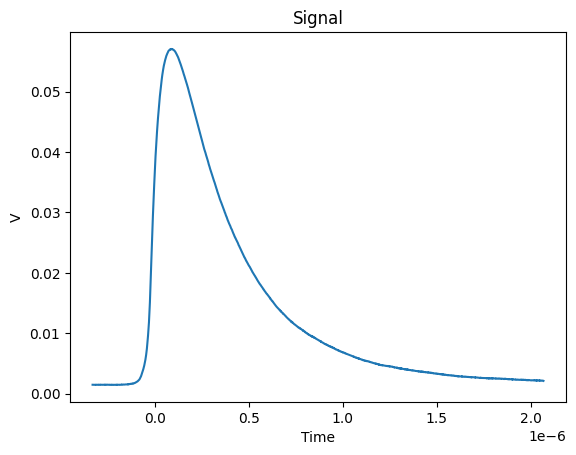

In [4]:
bgo_co = pd.read_csv(root_path + 'BGO_Co60.CSV')
quick_plot(bgo_co)

## CSI

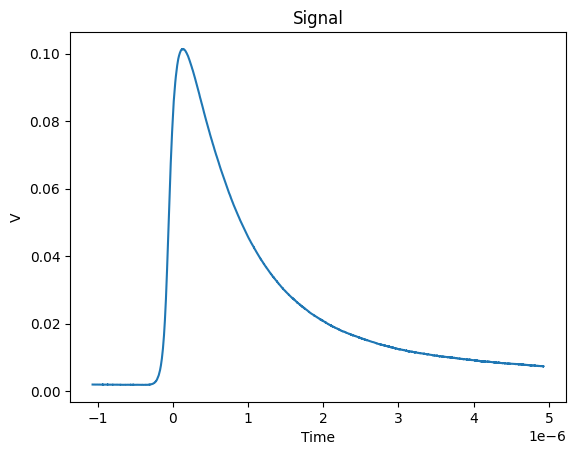

In [6]:
csi_na = pd.read_csv(root_path + 'CSI_Na22.CSV')
quick_plot(csi_na)

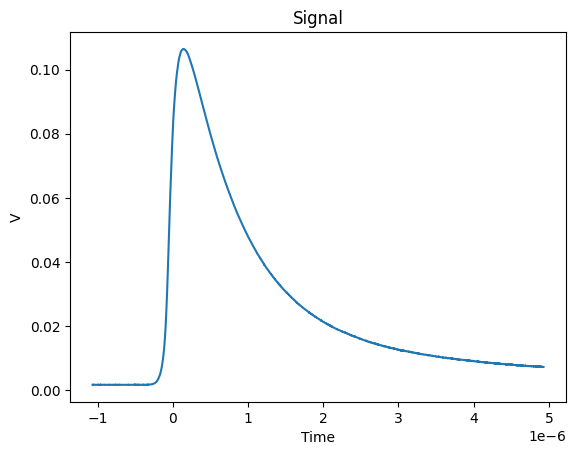

In [8]:
csi_co = pd.read_csv(root_path+'CSI_Co60.CSV')
quick_plot(csi_co)

## Lyso

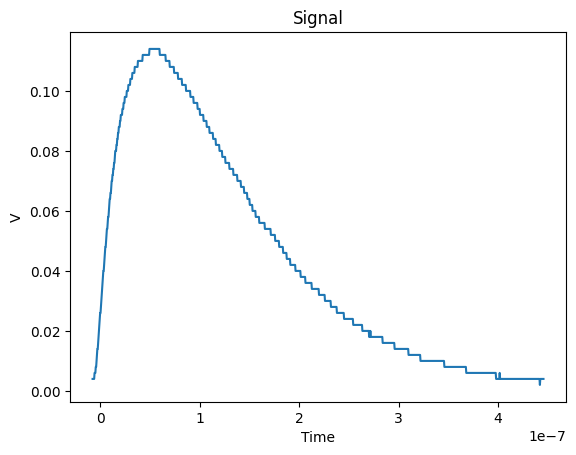

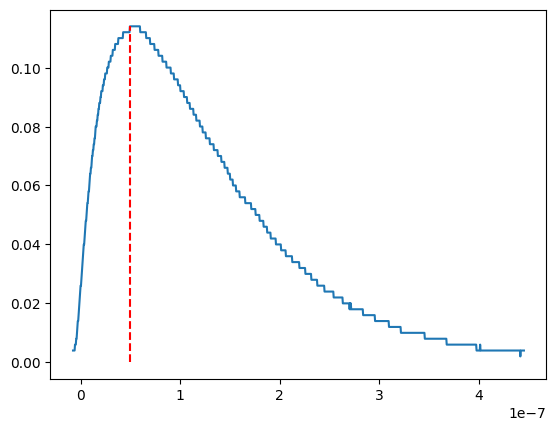

In [14]:
lyso = read_data('LySO/dat.CSV')
lyso = crop_df(lyso, 10, .002)
#lyso_rise, lyso_fall = rise_fall(lyso)
quick_plot(lyso)

lyso_ers = [.002] * len(lyso['Time'])

max_index_lyso, max_lyso = find_max(lyso)

plt.plot(lyso['Time'], lyso['V'])
plt.vlines(lyso['Time'][max_index_lyso], 0, max_lyso, color='r', linestyle='--')
plt.show()

In [ ]:
# descend fit
pars_lyso, vals_lyso, ers_lyso, *other_lyso = LS_fit(lyso['Time'][max_index_lyso:], lyso['V'][max_index_lyso:], lyso_ers[max_index_lyso:], expon, a=1, b=1)

In [ ]:

plt.plot(lyso_fall['Time'], lyso_fall['V'])